In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_respiratorio = pd.read_parquet('at_urg_respiratorio_semanal.parquet')
df_calidad_aire =pd.read_csv('Calidad del aire.csv',sep=';')

In [3]:
df_respiratorio.head(4)

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Anio,SemanaEstadistica,OrdenCausa,Causa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
0,133160,Hospital Comunitario de Achao,10,Región De Los Lagos,10210,Quinchao,33,Servicio de Salud Chiloé,Hospital,Servicio de Salud,...,2018,28,8,Crisis obstructiva bronquial (J40-J46),1,0,0,0,0,1
1,200143,SAPU Aguilucho,13,Región Metropolitana de Santiago,13123,Providencia,12,Servicio de Salud Metropolitano Oriente,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,2021,41,4,IRA Alta (J00-J06),17,0,0,1,14,2
2,200744,SUR Huertos Familiares,13,Región Metropolitana de Santiago,13303,Tiltil,9,Servicio de Salud Metropolitano Norte,Servicio de Urgencia Rural (SUR),Municipal,...,2022,35,6,Neumonía (J12-J18),1,0,0,1,0,0
3,116840,SAR Las Américas,7,Región Del Maule,7101,Talca,16,Servicio de Salud Del Maule,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2024,52,11,"Covid-19, Virus identificado U07.1",0,0,0,0,0,0


In [4]:
df_respiratorio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3172850 entries, 0 to 3172849
Data columns (total 25 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   EstablecimientoCodigo      object
 1   EstablecimientoGlosa       object
 2   RegionCodigo               object
 3   RegionGlosa                object
 4   ComunaCodigo               object
 5   ComunaGlosa                object
 6   ServicioSaludCodigo        object
 7   ServicioSaludGlosa         object
 8   TipoEstablecimiento        object
 9   DependenciaAdministrativa  object
 10  NivelAtencion              object
 11  TipoUrgencia               object
 12  Latitud                    object
 13  Longitud                   object
 14  NivelComplejidad           object
 15  Anio                       int32 
 16  SemanaEstadistica          int32 
 17  OrdenCausa                 int32 
 18  Causa                      object
 19  NumTotal                   int32 
 20  NumMenor1Anio           

In [5]:
df_respiratorio.isna().sum()

EstablecimientoCodigo        10464
EstablecimientoGlosa         10464
RegionCodigo                 10464
RegionGlosa                  10464
ComunaCodigo                 10464
ComunaGlosa                  10464
ServicioSaludCodigo          10464
ServicioSaludGlosa           10464
TipoEstablecimiento          10464
DependenciaAdministrativa    10464
NivelAtencion                10464
TipoUrgencia                 10464
Latitud                      10464
Longitud                     10464
NivelComplejidad             10464
Anio                             0
SemanaEstadistica                0
OrdenCausa                       0
Causa                            0
NumTotal                         0
NumMenor1Anio                    0
Num1a4Anios                      0
Num5a14Anios                     0
Num15a64Anios                    0
Num65oMas                        0
dtype: int64

In [6]:
df_respiratorio['Anio'] = pd.to_datetime(df_respiratorio['Anio'], format='%Y')

In [7]:
df_respiratorio.describe()

,Anio,SemanaEstadistica,OrdenCausa,NumTotal,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
count,3172850,3.172850e+06,3.172850e+06,3.172850e+06,3.172850e+06,3.172850e+06,3.172850e+06,3.172850e+06,3.172850e+06
mean,2020-05-05 02:00:15.898388224,2.606733e+01,1.199843e+01,3.409593e+01,2.152958e+00,6.283911e+00,7.078895e+00,1.556200e+01,3.018161e+00
min,2014-01-01 00:00:00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2018-01-01 00:00:00,1.300000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2021-01-01 00:00:00,2.600000e+01,8.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2023-01-01 00:00:00,3.900000e+01,1.100000e+01,2.100000e+01,1.000000e+00,3.000000e+00,3.000000e+00,9.000000e+00,3.000000e+00
max,2025-01-01 00:00:00,5.300000e+01,3.400000e+01,4.460000e+03,2.327000e+03,4.329000e+03,1.016000e+03,1.346000e+03,3.080000e+02
std,NaN,1.502996e+01,1.080485e+01,8.166050e+01,8.145352e+00,1.884002e+01,2.004998e+01,3.890232e+01,6.718043e+00


# Informacion
- El dataset cuenta con 25 columnas
- Tiene 3172850 registros

In [8]:
df_calidad_aire.head()

,Estacion,FECHA (YYMMDD),HORA (HHMM),MP10,MP2_5,CO,NO,NO2,O3,Humedad,Temperatura,Viento_v
0,Pudahuel,970404,0,"114,917",NaN,NaN,NaN,NaN,"354,166",NaN,NaN,NaN
1,Pudahuel,970405,0,"102,5",NaN,NaN,NaN,NaN,"385,833",NaN,NaN,NaN
2,Pudahuel,970406,0,"646,666",NaN,NaN,NaN,NaN,"33,25",NaN,NaN,NaN
3,Pudahuel,970407,0,"799,166",NaN,NaN,NaN,NaN,"400,833",NaN,NaN,NaN
4,Pudahuel,970408,0,"842,916",NaN,NaN,NaN,NaN,"325,833",NaN,NaN,NaN


In [9]:
df_calidad_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47953 entries, 0 to 47952
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Estacion        47953 non-null  object
 1   FECHA (YYMMDD)  47953 non-null  int64 
 2   HORA (HHMM)     47953 non-null  int64 
 3   MP10            47227 non-null  object
 4   MP2_5           38031 non-null  object
 5   CO              27641 non-null  object
 6   NO              21308 non-null  object
 7   NO2             18368 non-null  object
 8   O3              27937 non-null  object
 9   Humedad         19656 non-null  object
 10  Temperatura     20154 non-null  object
 11  Viento_v        20262 non-null  object
dtypes: int64(2), object(10)
memory usage: 4.4+ MB


In [10]:
df_calidad_aire['FECHA (YYMMDD)'] =df_calidad_aire['FECHA (YYMMDD)'].astype(str)
df_calidad_aire['FECHA (YYMMDD)'] = df_calidad_aire['FECHA (YYMMDD)'].str.zfill(6)
df_calidad_aire['FECHA (YYMMDD)'] = pd.to_datetime(df_calidad_aire['FECHA (YYMMDD)'], format='%y%m%d')
df_calidad_aire.head()

,Estacion,FECHA (YYMMDD),HORA (HHMM),MP10,MP2_5,CO,NO,NO2,O3,Humedad,Temperatura,Viento_v
0,Pudahuel,1997-04-04,0,"114,917",NaN,NaN,NaN,NaN,"354,166",NaN,NaN,NaN
1,Pudahuel,1997-04-05,0,"102,5",NaN,NaN,NaN,NaN,"385,833",NaN,NaN,NaN
2,Pudahuel,1997-04-06,0,"646,666",NaN,NaN,NaN,NaN,"33,25",NaN,NaN,NaN
3,Pudahuel,1997-04-07,0,"799,166",NaN,NaN,NaN,NaN,"400,833",NaN,NaN,NaN
4,Pudahuel,1997-04-08,0,"842,916",NaN,NaN,NaN,NaN,"325,833",NaN,NaN,NaN


In [11]:
df_calidad_aire =df_calidad_aire.rename(columns={'FECHA (YYMMDD)': 'fecha'})

In [12]:
df_calidad_aire.describe()

,fecha,HORA (HHMM)
count,47953,47953.0
mean,2010-06-04 09:02:59.500761088,0.0
min,1997-04-02 00:00:00,0.0
25%,2003-11-11 00:00:00,0.0
50%,2010-06-04 00:00:00,0.0
75%,2016-12-27 00:00:00,0.0
max,2023-07-27 00:00:00,0.0
std,NaN,0.0


In [13]:
df_calidad_aire['MP10']=df_calidad_aire['MP10'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['MP2_5']=df_calidad_aire['MP2_5'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['CO']=df_calidad_aire['CO'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['NO']=df_calidad_aire['NO'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['NO2']=df_calidad_aire['NO2'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['O3']=df_calidad_aire['O3'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['Humedad']=df_calidad_aire['Humedad'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['Temperatura']=df_calidad_aire['Temperatura'].str.replace(',', '.', regex=False).astype(float)
df_calidad_aire['Viento_v']=df_calidad_aire['Viento_v'].str.replace(',', '.', regex=False).astype(float)



df_calidad_aire.head()

,Estacion,fecha,HORA (HHMM),MP10,MP2_5,CO,NO,NO2,O3,Humedad,Temperatura,Viento_v
0,Pudahuel,1997-04-04,0,114.917,NaN,NaN,NaN,NaN,354.166,NaN,NaN,NaN
1,Pudahuel,1997-04-05,0,102.500,NaN,NaN,NaN,NaN,385.833,NaN,NaN,NaN
2,Pudahuel,1997-04-06,0,646.666,NaN,NaN,NaN,NaN,33.250,NaN,NaN,NaN
3,Pudahuel,1997-04-07,0,799.166,NaN,NaN,NaN,NaN,400.833,NaN,NaN,NaN
4,Pudahuel,1997-04-08,0,842.916,NaN,NaN,NaN,NaN,325.833,NaN,NaN,NaN


In [14]:
df_calidad_aire.fillna(0, inplace=True)
df_calidad_aire.head(5)

,Estacion,fecha,HORA (HHMM),MP10,MP2_5,CO,NO,NO2,O3,Humedad,Temperatura,Viento_v
0,Pudahuel,1997-04-04,0,114.917,0.0,0.0,0.0,0.0,354.166,0.0,0.0,0.0
1,Pudahuel,1997-04-05,0,102.500,0.0,0.0,0.0,0.0,385.833,0.0,0.0,0.0
2,Pudahuel,1997-04-06,0,646.666,0.0,0.0,0.0,0.0,33.250,0.0,0.0,0.0
3,Pudahuel,1997-04-07,0,799.166,0.0,0.0,0.0,0.0,400.833,0.0,0.0,0.0
4,Pudahuel,1997-04-08,0,842.916,0.0,0.0,0.0,0.0,325.833,0.0,0.0,0.0


# Preguntas

In [15]:
filtered_causes_df = df_respiratorio[~df_respiratorio['Causa'].isin(['TOTAL CAUSAS SISTEMA RESPIRATORIO', 'HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO', 'HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1', 'HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2'])]
top_5_enfermedade = filtered_causes_df.groupby("Causa")["NumTotal"].sum().sort_values(ascending=False).head(5)
top_5_enfermedade

Causa
IRA Alta (J00-J06)                                      33464799
Bronquitis/bronquiolitis aguda (J20-J21)                 7261966
Covid-19, Virus no identificado U07.2                    4909392
Otra causa respiratoria (J22, J30-J39, J47, J60-J98)     4811223
Crisis obstructiva bronquial (J40-J46)                   2421866
Name: NumTotal, dtype: int32

In [16]:

personas_65_mas = filtered_causes_df.groupby('EstablecimientoGlosa')['Num65oMas'].sum().sort_values(ascending=False).head(10)
personas_65_mas

EstablecimientoGlosa
Hospital Padre Bernabé de Lucerna (Panguipulli) (D)         37278
SAR Renca                                                   30653
Complejo Asistencial Dr. Víctor Ríos Ruiz (Los Ángeles)     29704
SAR Conchalí                                                28969
SAPU La Granja                                              28957
Complejo Hospitalario San José (Santiago, Independencia)    27363
Hospital San José (Coronel)                                 27173
Hospital Barros Luco Trudeau (Santiago, San Miguel)         26941
Hospital Las Higueras (Talcahuano)                          26447
Hospital de San Carlos                                      25812
Name: Num65oMas, dtype: int32

In [17]:
estacion = df_calidad_aire.groupby('Estacion')[['MP10'	,'MP2_5',	'CO'	,'NO',	'NO2',	'O3']].mean()
estacion

,MP10,MP2_5,CO,NO,NO2,O3
Estacion,,,,,,
El Bosque,315.999101,79.893596,0.000000,0.000000,0.000000,0.000000
La Florida,313.502861,155.894948,0.000000,0.000000,0.000000,0.000000
Las Condes,299.353737,128.705342,10.915948,288.843488,109.682746,189.455122
Pudahuel,293.228426,155.276266,35.622926,307.314519,125.537911,189.869547
Santiago,302.046441,159.526216,38.401089,189.284849,88.290581,172.901034


In [18]:
df_calidad_aire['fecha'] = pd.to_datetime(df_calidad_aire['fecha'])
df_calidad_aire['anio'] = df_calidad_aire['fecha'].dt.year


In [19]:
df_calidad_aire.head()

,Estacion,fecha,HORA (HHMM),MP10,MP2_5,CO,NO,NO2,O3,Humedad,Temperatura,Viento_v,anio
0,Pudahuel,1997-04-04,0,114.917,0.0,0.0,0.0,0.0,354.166,0.0,0.0,0.0,1997
1,Pudahuel,1997-04-05,0,102.500,0.0,0.0,0.0,0.0,385.833,0.0,0.0,0.0,1997
2,Pudahuel,1997-04-06,0,646.666,0.0,0.0,0.0,0.0,33.250,0.0,0.0,0.0,1997
3,Pudahuel,1997-04-07,0,799.166,0.0,0.0,0.0,0.0,400.833,0.0,0.0,0.0,1997
4,Pudahuel,1997-04-08,0,842.916,0.0,0.0,0.0,0.0,325.833,0.0,0.0,0.0,1997


In [20]:
df_respiratorio['anio'] = df_respiratorio['Anio'].dt.year

In [41]:
df_calidad_aire['num_semana'] = df_calidad_aire['fecha'].dt.isocalendar().week

In [46]:
calidad_aire_2014 = df_calidad_aire[df_calidad_aire['anio']>=2014]
filtro_calidad_aire = calidad_aire_2014.groupby(['anio','num_semana','Estacion'])[['MP10'	,'MP2_5',	'CO'	,'NO',	'NO2',	'O3']].mean()

filtro_calidad_aire.reset_index(inplace=True)
filtro_calidad_aire

,anio,num_semana,Estacion,MP10,MP2_5,CO,NO,NO2,O3
0,2014,1,El Bosque,355.567500,146.817500,0.000000,0.000000,0.000000,0.0000
1,2014,1,La Florida,381.379875,335.833750,0.000000,0.000000,0.000000,0.0000
2,2014,1,Las Condes,213.445125,96.612125,0.339310,231.217125,213.757625,257.4345
3,2014,1,Pudahuel,330.301875,299.678125,0.406613,275.662000,422.436250,257.4345
4,2014,1,Santiago,338.597875,83.333375,0.498938,335.412250,386.208625,233.4990
...,...,...,...,...,...,...,...,...,...
2506,2023,52,El Bosque,27.000000,17.000000,0.000000,0.000000,0.000000,0.0000
2507,2023,52,La Florida,34.000000,21.000000,0.000000,0.000000,0.000000,0.0000
2508,2023,52,Las Condes,34.000000,18.000000,0.250000,166.412000,7.250000,30.0000
2509,2023,52,Pudahuel,33.000000,15.000000,0.390000,124.544000,6.120000,30.0000


In [47]:
df_merge = pd.merge(df_respiratorio,filtro_calidad_aire,left_on=['ComunaGlosa','anio','SemanaEstadistica'],right_on=['Estacion','anio','num_semana'],how='right')
df_merge.head()

,EstablecimientoCodigo,EstablecimientoGlosa,RegionCodigo,RegionGlosa,ComunaCodigo,ComunaGlosa,ServicioSaludCodigo,ServicioSaludGlosa,TipoEstablecimiento,DependenciaAdministrativa,...,Num65oMas,anio,num_semana,Estacion,MP10,MP2_5,CO,NO,NO2,O3
0,113823,SAR Haydee López,13,Región Metropolitana de Santiago,13105,El Bosque,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,0.0,2014,1,El Bosque,355.5675,146.8175,0.0,0.0,0.0,0.0
1,113823,SAR Haydee López,13,Región Metropolitana de Santiago,13105,El Bosque,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2.0,2014,1,El Bosque,355.5675,146.8175,0.0,0.0,0.0,0.0
2,113823,SAR Haydee López,13,Región Metropolitana de Santiago,13105,El Bosque,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,2.0,2014,1,El Bosque,355.5675,146.8175,0.0,0.0,0.0,0.0
3,113814,SAPU Cóndores de Chile,13,Región Metropolitana de Santiago,13105,El Bosque,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia (SAPU),Municipal,...,0.0,2014,1,El Bosque,355.5675,146.8175,0.0,0.0,0.0,0.0
4,113823,SAR Haydee López,13,Región Metropolitana de Santiago,13105,El Bosque,13,Servicio de Salud Metropolitano Sur,Servicio de Atención Primaria de Urgencia de A...,Municipal,...,1.0,2014,1,El Bosque,355.5675,146.8175,0.0,0.0,0.0,0.0


In [48]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111197 entries, 0 to 111196
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   EstablecimientoCodigo      111192 non-null  object        
 1   EstablecimientoGlosa       111192 non-null  object        
 2   RegionCodigo               111192 non-null  object        
 3   RegionGlosa                111192 non-null  object        
 4   ComunaCodigo               111192 non-null  object        
 5   ComunaGlosa                111192 non-null  object        
 6   ServicioSaludCodigo        111192 non-null  object        
 7   ServicioSaludGlosa         111192 non-null  object        
 8   TipoEstablecimiento        111192 non-null  object        
 9   DependenciaAdministrativa  111192 non-null  object        
 10  NivelAtencion              111192 non-null  object        
 11  TipoUrgencia               111192 non-null  object  

In [49]:
prueba = df_merge[df_merge['Causa']=='IRA Alta (J00-J06)']['MP2_5'].mean()
prueba

98.17011713345924

In [54]:
establecimientos = df_merge['EstablecimientoGlosa'].unique()
establecimientos

array(['SAR Haydee López', 'SAPU Cóndores de Chile',
       'SAPU Dr. Carlos Lorca', 'SAPU Santa Laura',
       "SAPU Villa O'Higgins", 'SAPU Los Quillayes', 'SAPU La Florida',
       'Hospital Clínico Metropolitano La Florida Dra. Eloísa Díaz Insunza',
       'SAPU Los Castaños', 'SAPU Santa Amalia',
       'SAPU Dr. Fernando Maffioletti', 'SAPU Trinidad',
       'SAPU Aníbal Ariztía', 'SAPU Violeta Parra',
       'SAPU Pudahuel Poniente', 'SAPU Dr. Gustavo Molina',
       'SAR La Estrella',
       'Hospital San Juan de Dios (Santiago, Santiago)',
       'Hospital Clínico San Borja Arriarán',
       'Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río',
       'SAPU Consultorio Nº1', 'SAPU José Alvo', 'SAPU Ignacio Domeyko',
       nan, 'Instituto Traumatológico Dr. Teodoro Gebauer',
       'SAR Violeta Parra'], dtype=object)

In [55]:
establecimiento_contaminantes = df_merge.groupby('EstablecimientoGlosa').agg({'NumTotal':'sum','MP2_5':'mean'}).sort_values(by='NumTotal',ascending=False).head(10)
establecimiento_contaminantes

,NumTotal,MP2_5
EstablecimientoGlosa,,
Hospital Clínico San Borja Arriarán,358862.0,94.563004
SAPU Dr. Gustavo Molina,336268.0,88.295111
SAR Haydee López,330445.0,86.774061
SAR La Estrella,311010.0,88.501180
SAPU Los Quillayes,292154.0,91.030848
SAPU Villa O'Higgins,277033.0,91.030848
SAPU Dr. Carlos Lorca,222371.0,87.126373
SAPU Aníbal Ariztía,219978.0,70.648538
SAPU Violeta Parra,215358.0,88.548020


In [60]:
comuna_contaminantes =df_merge.groupby('ComunaGlosa').agg({'NumTotal':'sum','MP2_5':'mean'}).sort_values(by='NumTotal',ascending=False)
comuna_contaminantes

,NumTotal,MP2_5
ComunaGlosa,,
La Florida,1685744.0,90.222305
Pudahuel,1076537.0,87.295063
El Bosque,945900.0,87.037916
Santiago,870433.0,80.799226
Las Condes,219978.0,70.648538


In [65]:
establicimiento_causa = df_merge.pivot_table(index='EstablecimientoGlosa', columns='Causa', values='NumTotal', aggfunc='mean')
establicimiento_causa

Causa,Bronquitis/bronquiolitis aguda (J20-J21),"Covid-19, Virus identificado U07.1","Covid-19, Virus no identificado U07.2",Crisis obstructiva bronquial (J40-J46),"HOSPITALIZACIONES COVID-19, VIRUS IDENTIFICADO U07.1","HOSPITALIZACIONES COVID-19, VIRUS NO IDENTIFICADO U07.2",HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO,IRA Alta (J00-J06),Influenza (J09-J11),Neumonía (J12-J18),"Otra causa respiratoria (J22, J30-J39, J47, J60-J98)",TOTAL CAUSAS SISTEMA RESPIRATORIO
EstablecimientoGlosa,,,,,,,,,,,,
Hospital Clínico Metropolitano La Florida Dra. Eloísa Díaz Insunza,11.512974,11.170213,100.303191,2.269461,12.622340,74.835106,8.123752,39.127745,1.700599,8.818363,9.768463,73.197605
Hospital Clínico San Borja Arriarán,57.848790,1.300546,2.601093,30.239919,0.021858,0.010929,17.455645,200.131048,1.643145,10.219758,52.219758,352.302419
"Hospital San Juan de Dios (Santiago, Santiago)",3.475050,27.681081,8.248649,10.087824,11.172973,0.622222,20.508982,8.834331,1.099800,28.329341,10.407186,62.233533
Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río,7.375250,14.361702,73.760638,8.489022,0.000000,0.090426,14.411178,26.952096,1.135729,9.898204,20.089820,73.940120
Instituto Traumatológico Dr. Teodoro Gebauer,0.000000,0.000000,10.732240,0.000000,0.000000,0.000000,0.000000,0.041494,0.000000,0.008299,0.000000,0.049793
SAPU Aníbal Ariztía,26.872255,26.108696,58.619565,11.159681,0.000000,0.000000,0.000000,144.373253,2.253493,7.229541,12.091816,203.980040
SAPU Consultorio Nº1,27.594810,15.388298,74.973404,6.307385,0.000000,0.000000,0.000000,130.067864,2.105788,4.381238,26.191617,196.648703
SAPU Cóndores de Chile,19.346614,0.211957,7.059783,5.581673,0.000000,0.000000,0.000000,159.814741,1.336653,4.249004,17.693227,208.021912
SAPU Dr. Carlos Lorca,38.721116,2.342391,67.065217,5.428287,0.000000,0.000000,0.000000,129.366534,0.609562,3.776892,30.862550,208.764940


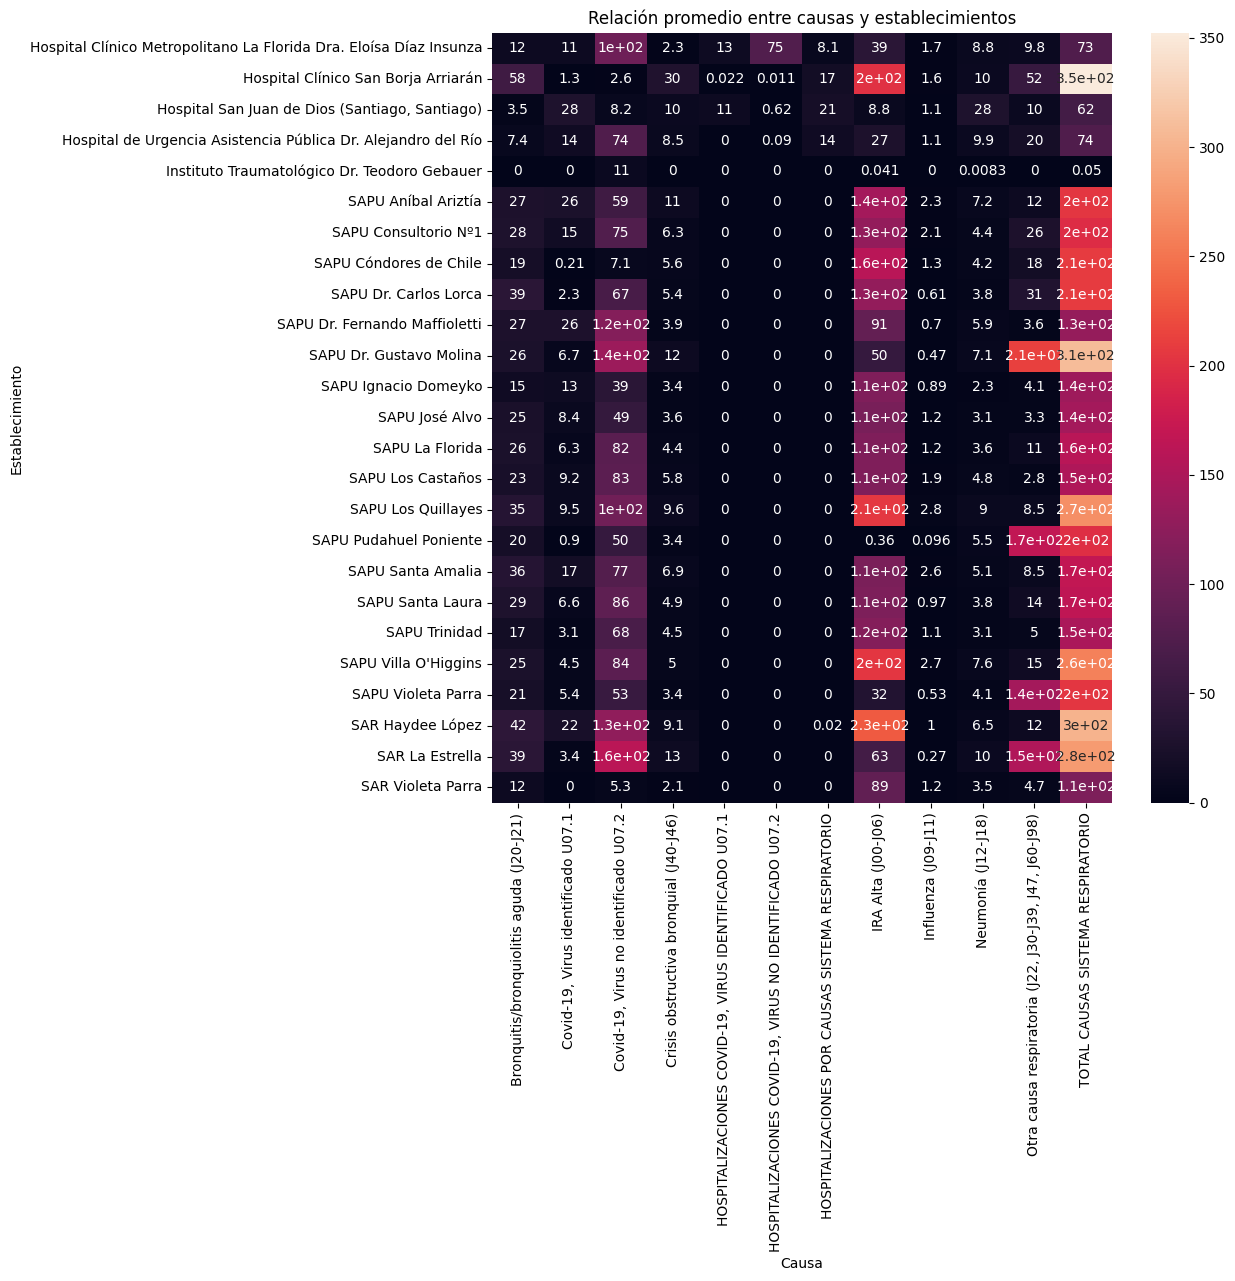

In [69]:
plt.figure(figsize=(10,10))
plt.title('Relación promedio entre causas y establecimientos')
sns.heatmap(establicimiento_causa,annot=True)
plt.ylabel('Establecimiento')
plt.show()

In [70]:
comuna_etario = df_merge.groupby('ComunaGlosa')[['NumMenor1Anio',	'Num1a4Anios',	'Num5a14Anios',	'Num15a64Anios'	,'Num65oMas']].sum()
comuna_etario

,NumMenor1Anio,Num1a4Anios,Num5a14Anios,Num15a64Anios,Num65oMas
ComunaGlosa,,,,,
El Bosque,30947.0,183727.0,200599.0,463988.0,66639.0
La Florida,101191.0,311554.0,333583.0,793470.0,145946.0
Las Condes,6955.0,25702.0,31375.0,127694.0,28252.0
Pudahuel,43604.0,160831.0,188333.0,613720.0,70049.0
Santiago,107377.0,226640.0,141220.0,308781.0,86415.0


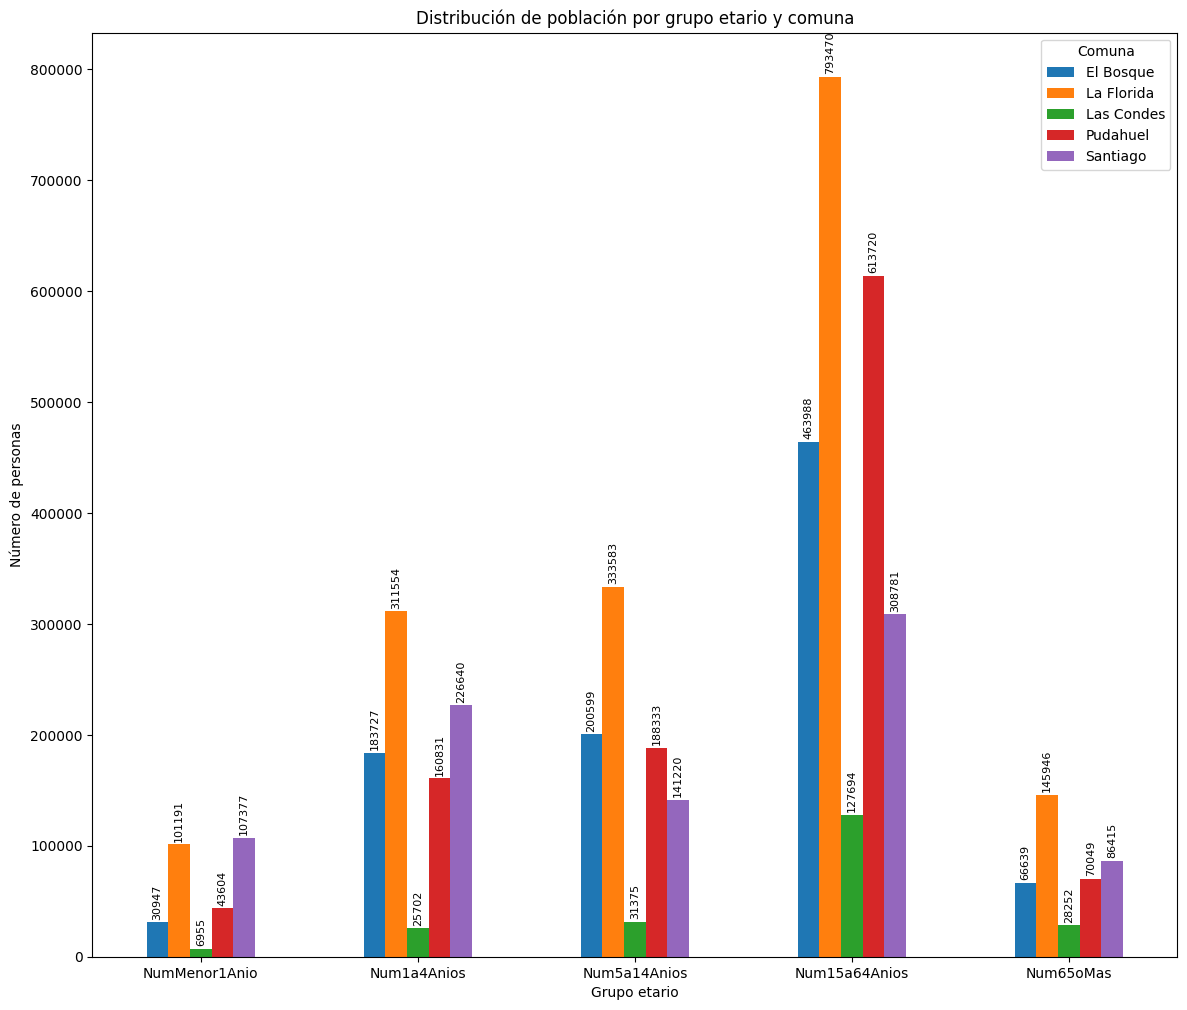

In [75]:
ax = comuna_etario.T.plot(kind="bar", figsize=(14, 12))

# Títulos y etiquetas
plt.title("Distribución de población por grupo etario y comuna")
plt.xlabel("Grupo etario")
plt.ylabel("Número de personas")
plt.xticks(rotation=0)
plt.legend(title="Comuna")

# Agregar los valores en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8, rotation=90, padding=2)
plt.show()